In [1]:
import hkvsobekpy as hkv
import os

In [2]:
reachseg_his = r'D:\Projects\Pr\3651.10\Toeleveringen\08122017_AnneJopen_wetransfer\REACHSEG.HIS'

In [3]:
rseg = hkv.read_his.LeesMetadata(reachseg_his)

In [4]:
locations = rseg.KrijgLokaties()
parameters = rseg.KrijgParameters()
timesteps = rseg.KrijgTijdstappen()

In [5]:
parameters

['Discharge mean(m³/s)', 'Velocity mean (m/s) ', 'Waterlevel slope mea']

In [6]:
parameter = parameters[0]
location = locations[0]

In [7]:
df = rseg.EnkeleWaardenArray(location=location, parameter=parameters[0], jaarmax_as='none')

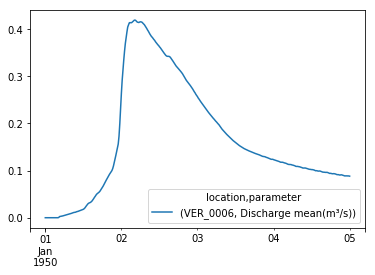

In [8]:
df.plot()

In [9]:
bui_file = r'D:\Projects\Pr\3651.10\Toeleveringen\08122017_AnneJopen_wetransfer\T100ST2.BUI'
df_bui = hkv.read_bui(bui_file)

In [10]:
df_bui.head()

,De Bilt,Verdamping,De Bilt Test
1950-01-01 00:00:00,0.00000,0,0.000000
1950-01-01 01:00:00,0.20691,0,0.248292
1950-01-01 02:00:00,0.51183,0,0.614196
1950-01-01 03:00:00,0.60984,0,0.731808
1950-01-01 04:00:00,0.41382,0,0.496584


In [11]:
his_folder = r'D:\Projects\Pr\3651.10\Toeleveringen\08122017_AnneJopen_wetransfer'
his_file='reachseg'

In [12]:
df_his = hkv.plausibility.read_his_series(his_file=his_file,
                                          location=locations[0],
                                          parameter=parameters[0],
                                          his_folder=his_folder)
df_his.head()

Normalized unicode Discharge mean(m³/s) matches Discharge mean(m³/s)


location,VER_0006
parameter,Discharge mean(m³/s)
1950-01-01 00:00:00,0.0
1950-01-01 00:15:00,0.0
1950-01-01 00:30:00,0.0
1950-01-01 00:45:00,0.0
1950-01-01 01:00:00,0.0


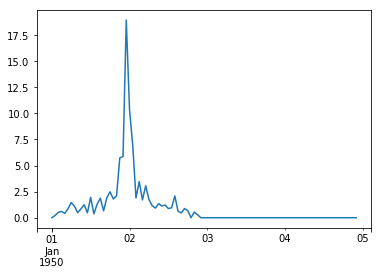

In [13]:
# location to query
bui_location = 'De Bilt'
# yyyy-mm-dd:yyyy-mm-dd
df_bui.loc['1950-01-01':'1950-01-08',bui_location].plot()

In [18]:
bui_locations = ['De Bilt','Verdamping','De Bilt Test']
df_bui_sel, start_his, end_his, df_bui_std, df_his_std = hkv.plausibility.prepare_bui_his(df_his, df_bui, bui_locations)

In [19]:
out_folder = r'D:\Projects\Pr\3651.10\Toeleveringen\08122017_AnneJopen_wetransfer\boezemformaat'

In [20]:
len(df_bui_sel.columns)

3

create a barchart for the bui-locations


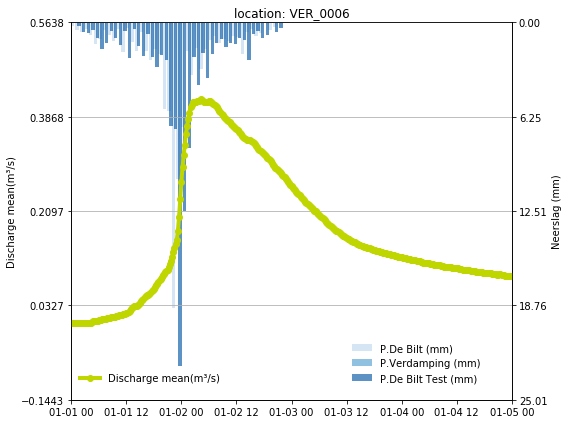

In [21]:
hkv.plausibility.plot_bui_his(df_his, df_bui_sel, start_his, end_his, 
                              df_bui_std, df_his_std, his_file, 
                              parameter, location, out_folder, 
                              savefigure=False, threshold_bar=4, barwidth=0.03,baroffset=0.03)#, barwidth=0.04, baroffset=0.001)

In [22]:
df_bui_his = hkv.plausibility.table_bui_his(df_his, df_bui_sel)
df_bui_his.head()

location,VER_0006,De Bilt,Verdamping,De Bilt Test
parameter,Discharge mean(m³/s),Precipitation (mm),Precipitation (mm),Precipitation (mm)
1950-01-01 00:00:00,0.0,0.00000,0.0,0.000000
1950-01-01 00:15:00,0.0,NaN,NaN,NaN
1950-01-01 00:30:00,0.0,NaN,NaN,NaN
1950-01-01 00:45:00,0.0,NaN,NaN,NaN
1950-01-01 01:00:00,0.0,0.20691,0.0,0.248292


In [23]:
bui_his_to_csv = os.path.join(out_folder, 'comb_his_bui.csv')
df_bui_his.to_csv(bui_his_to_csv)


import pandas as pd

df_in = pd.read_csv(bui_his_to_csv, header=[0, 1])
df_in.head()

In [28]:
shp_file = r'D:\Projects\Pr\3651.10\Toeleveringen\08122017_AnneJopen_wetransfer\Sbk_FGrPt_n.dbf'
shp_hiskey = 'HIS_FILE'
shp_locationkey = 'LOCATIES'
shp_parameterkey = 'PARAMETERS'
hkv.plausibility.EnsembleRunner(shp_file, 
                                bui_file, 
                                his_folder, 
                                out_folder, 
                                shp_hiskey, shp_locationkey, shp_parameterkey, savefigure=True, bui_locations='auto', bui_locations_aantal=10, savetable=True)

start ensemble runner
read shp-file
read bui-file


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Waterlevel mean (m AD changed into Waterlevel mean (m A, since similarity is 0.98
create a barchart for the bui-locations
Waterlevel mean (m AD changed into Waterlevel mean (m A, since similarity is 0.98
create a barchart for the bui-locations
Normalized unicode Waterlevel slope MEA matches Waterlevel slope mea
create a barchart for the bui-locations
Discharge mean (m3/s) changed into Discharge mean(m³/s), since similarity is 0.98
create a barchart for the bui-locations

done
